In [ ]:
import pandas as pd
#import BRFSS 2010 data and select columns of interest
df2=pd.read_csv('10.csv')
df2.shape
df2=df2[['PHYSHLTH', 'HLTHPLAN', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'QLREST2', 'EXERANY2', 'SMOKDAY2', 'AGE', 'EDUCA', 'INCOME2', 'SEX', 'EMTSUPRT', 'LSATISFY', 'ADANXEV', 'ADDEPEV']]


In [ ]:
#descriptive statistics
df2.describe().T


,count,mean,std,min,25%,50%,75%,max
PHYSHLTH,451069.0,60.513775,37.008804,1.0,15.0,88.0,88.0,99.0
HLTHPLAN,451072.0,1.124619,0.470611,1.0,1.0,1.0,1.0,9.0
PERSDOC2,451072.0,1.349510,0.763039,1.0,1.0,1.0,1.0,9.0
MEDCOST,451073.0,1.895964,0.429873,1.0,2.0,2.0,2.0,9.0
CHECKUP1,451073.0,1.599346,1.249452,1.0,1.0,1.0,2.0,9.0
QLREST2,451072.0,41.332650,37.626869,1.0,5.0,25.0,88.0,99.0
EXERANY2,451073.0,1.283132,0.507188,1.0,1.0,1.0,2.0,9.0
SMOKDAY2,207503.0,2.414413,0.881948,1.0,1.0,3.0,3.0,9.0
AGE,451074.0,56.342866,17.049061,7.0,45.0,57.0,69.0,99.0
EDUCA,450792.0,4.824019,1.102443,1.0,4.0,5.0,6.0,9.0


In [ ]:
#shape of dataframe
df2.shape

(451075, 16)

In [ ]:
#column names
df2.columns

Index(['PHYSHLTH', 'HLTHPLAN', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'QLREST2',
       'EXERANY2', 'SMOKDAY2', 'AGE', 'EDUCA', 'INCOME2', 'SEX', 'EMTSUPRT',
       'LSATISFY', 'ADANXEV', 'ADDEPEV'],
      dtype='object')

In [ ]:
df2.PHYSHLTH.unique()


array([ 3., 30., 88.,  2., 10.,  4., 28.,  5.,  7., 77.,  1., 20.,  9.,
        6., 15., 14., 99., 18., 21., 29., 25., nan, 16., 26., 27.,  8.,
       23., 12., 17., 22., 19., 11., 24., 13.])

In [ ]:
#recode variables as NAN according to missing values in codebook
import numpy as np
df2.PHYSHLTH=df2.PHYSHLTH.replace(88, 0)
df2.PHYSHLTH=df2.PHYSHLTH.replace(77, np.nan)
df2.PHYSHLTH=df2.PHYSHLTH.replace(99, np.nan)
df2.ADDEPEV=df2.ADDEPEV.replace(7, np.nan)
df2.ADDEPEV=df2.ADDEPEV.replace(9, np.nan)
df2.HLTHPLAN=df2.HLTHPLAN.replace(7, np.nan)
df2.HLTHPLAN=df2.HLTHPLAN.replace(9, np.nan)
df2.PERSDOC2=df2.PERSDOC2.replace(7, np.nan)
df2.PERSDOC2=df2.PERSDOC2.replace(9, np.nan)
df2.MEDCOST=df2.MEDCOST.replace(7, np.nan)
df2.MEDCOST=df2.MEDCOST.replace(9, np.nan)
df2.CHECKUP1=df2.CHECKUP1.replace(7, np.nan)
df2.CHECKUP1=df2.CHECKUP1.replace(9, np.nan)
df2.QLREST2=df2.QLREST2.replace(77, np.nan)
df2.QLREST2=df2.QLREST2.replace(99, np.nan)
df2.QLREST2=df2.QLREST2.replace(88, 0)
df2.EXERANY2=df2.EXERANY2.replace(7, np.nan)
df2.EXERANY2=df2.EXERANY2.replace(9, np.nan)
df2.SMOKDAY2=df2.SMOKDAY2.replace(7, np.nan)
df2.SMOKDAY2=df2.SMOKDAY2.replace(9, np.nan)
df2.AGE=df2.AGE.replace(7, np.nan)
df2.AGE=df2.AGE.replace(9, np.nan)
df2.EDUCA=df2.EDUCA.replace(9, np.nan)
df2.INCOME2=df2.INCOME2.replace(77, np.nan)
df2.INCOME2=df2.INCOME2.replace(99, np.nan)
df2.EMTSUPRT=df2.EMTSUPRT.replace(7, np.nan)
df2.EMTSUPRT=df2.EMTSUPRT.replace(9, np.nan)
df2.LSATISFY=df2.LSATISFY.replace(7, np.nan)
df2.LSATISFY=df2.LSATISFY.replace(9, np.nan)
df2.ADANXEV=df2.ADANXEV.replace(7, np.nan)
df2.ADANXEV=df2.ADANXEV.replace(9, np.nan)


In [ ]:
#drop missing values for criterion and variables with >50% missing
df2=df2.dropna(subset=['ADDEPEV', 'ADANXEV', 'SMOKDAY2'])

In [ ]:
#list missing values
nas=pd.DataFrame(df2.isnull().sum().sort_values(ascending=False),columns = ['Missing'])
pos = nas['Missing'] > 0
nas[pos]

,Missing
INCOME2,4658
PHYSHLTH,862
EMTSUPRT,671
QLREST2,645
CHECKUP1,365
LSATISFY,285
AGE,231
MEDCOST,87
PERSDOC2,84
HLTHPLAN,80


In [ ]:

df1=df2[['PHYSHLTH', 'AGE', 'QLREST2']] #new df for float data



In [ ]:
df2=df2.drop(['PHYSHLTH', 'AGE', 'QLREST2'],axis=1) #df2 for categorical data

In [ ]:
df2.head()

,HLTHPLAN,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SMOKDAY2,EDUCA,INCOME2,SEX,EMTSUPRT,LSATISFY,ADANXEV,ADDEPEV
9633,1.0,3.0,2.0,3.0,1.0,3.0,6.0,7.0,1.0,2.0,2.0,2.0,2.0
9634,1.0,1.0,2.0,1.0,1.0,3.0,4.0,6.0,2.0,1.0,4.0,2.0,2.0
9645,1.0,1.0,2.0,8.0,1.0,2.0,6.0,8.0,2.0,1.0,1.0,2.0,2.0
9650,1.0,2.0,2.0,1.0,1.0,3.0,6.0,4.0,2.0,3.0,1.0,2.0,2.0
9651,1.0,1.0,2.0,1.0,1.0,1.0,5.0,5.0,2.0,1.0,2.0,1.0,1.0


In [ ]:
df1.head()

,PHYSHLTH,AGE,QLREST2
9633,3.0,52.0,5.0
9634,0.0,62.0,3.0
9645,0.0,51.0,1.0
9650,0.0,73.0,0.0
9651,0.0,44.0,3.0


In [ ]:
#list missing values
nas=pd.DataFrame(df2.isnull().sum().sort_values(ascending=False),columns = ['missing counts'])
pos = nas['missing counts'] > 0
nas[pos]


,missing counts
INCOME2,4658
EMTSUPRT,671
CHECKUP1,365
LSATISFY,285
MEDCOST,87
PERSDOC2,84
HLTHPLAN,80
EDUCA,67
EXERANY2,42


In [ ]:
#get dummy variables
#df2=pd.get_dummies(df2_new)

In [ ]:
#new column names with dummies
df2.columns

Index(['HLTHPLAN', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'EXERANY2', 'SMOKDAY2',
       'EDUCA', 'INCOME2', 'SEX', 'EMTSUPRT', 'LSATISFY', 'ADANXEV',
       'ADDEPEV'],
      dtype='object')

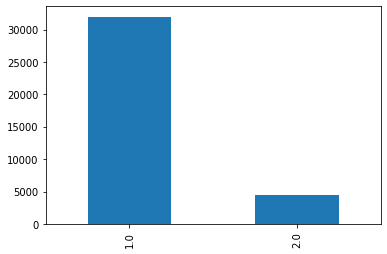

In [ ]:
#work with df2 for categorical EDA
df2['HLTHPLAN'].value_counts().plot(kind='bar')


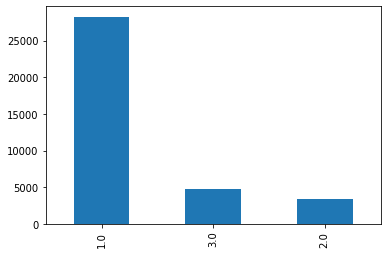

In [ ]:
#work with df2 for categorical EDA
df2['PERSDOC2'].value_counts().plot(kind='bar')

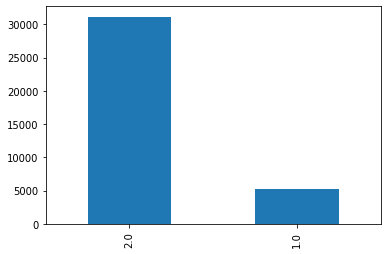

In [ ]:
df2['MEDCOST'].value_counts().plot(kind='bar')

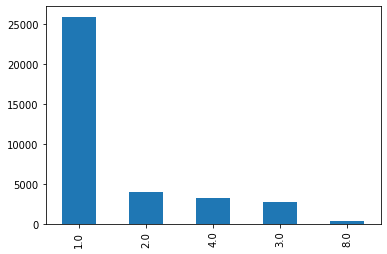

In [ ]:
df2['CHECKUP1'].value_counts().plot(kind='bar')

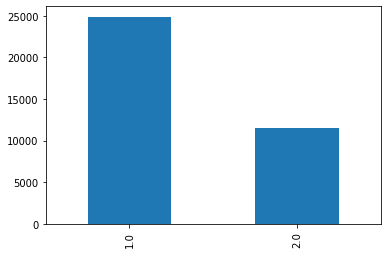

In [ ]:
df2['EXERANY2'].value_counts().plot(kind='bar')

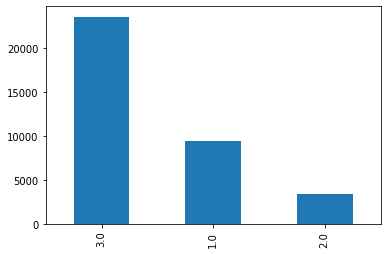

In [ ]:
df2['SMOKDAY2'].value_counts().plot(kind='bar')

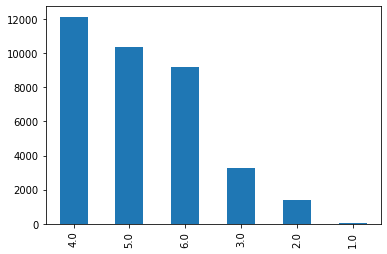

In [ ]:
df2['EDUCA'].value_counts().plot(kind='bar')

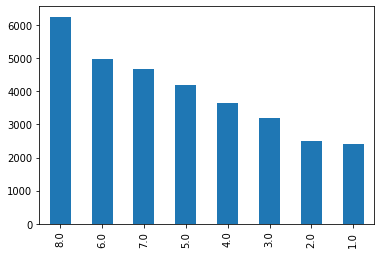

In [ ]:
df2['INCOME2'].value_counts().plot(kind='bar')

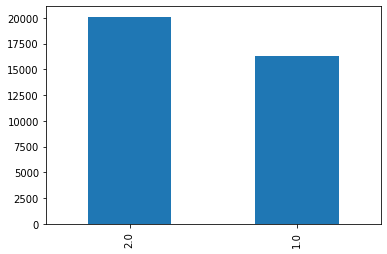

In [ ]:
df2['SEX'].value_counts().plot(kind='bar')

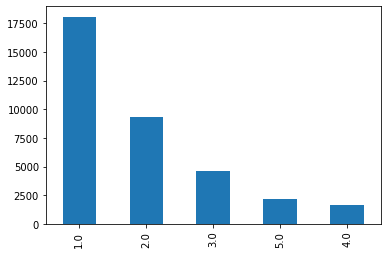

In [ ]:
df2['EMTSUPRT'].value_counts().plot(kind='bar')

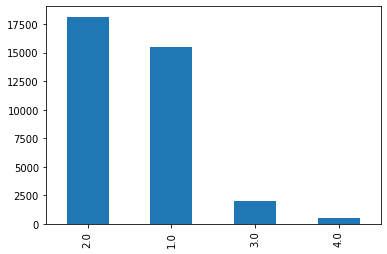

In [ ]:
df2['LSATISFY'].value_counts().plot(kind='bar')

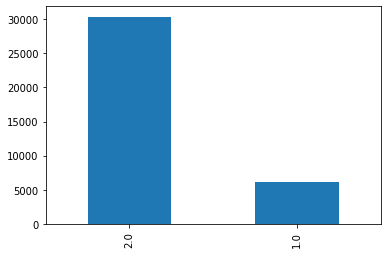

In [ ]:
df2['ADANXEV'].value_counts().plot(kind='bar')

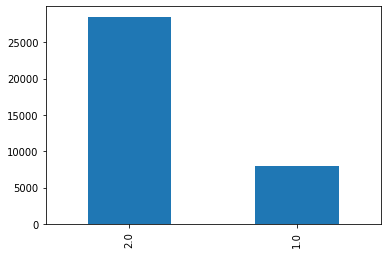

In [ ]:
df2['ADDEPEV'].value_counts().plot(kind='bar')

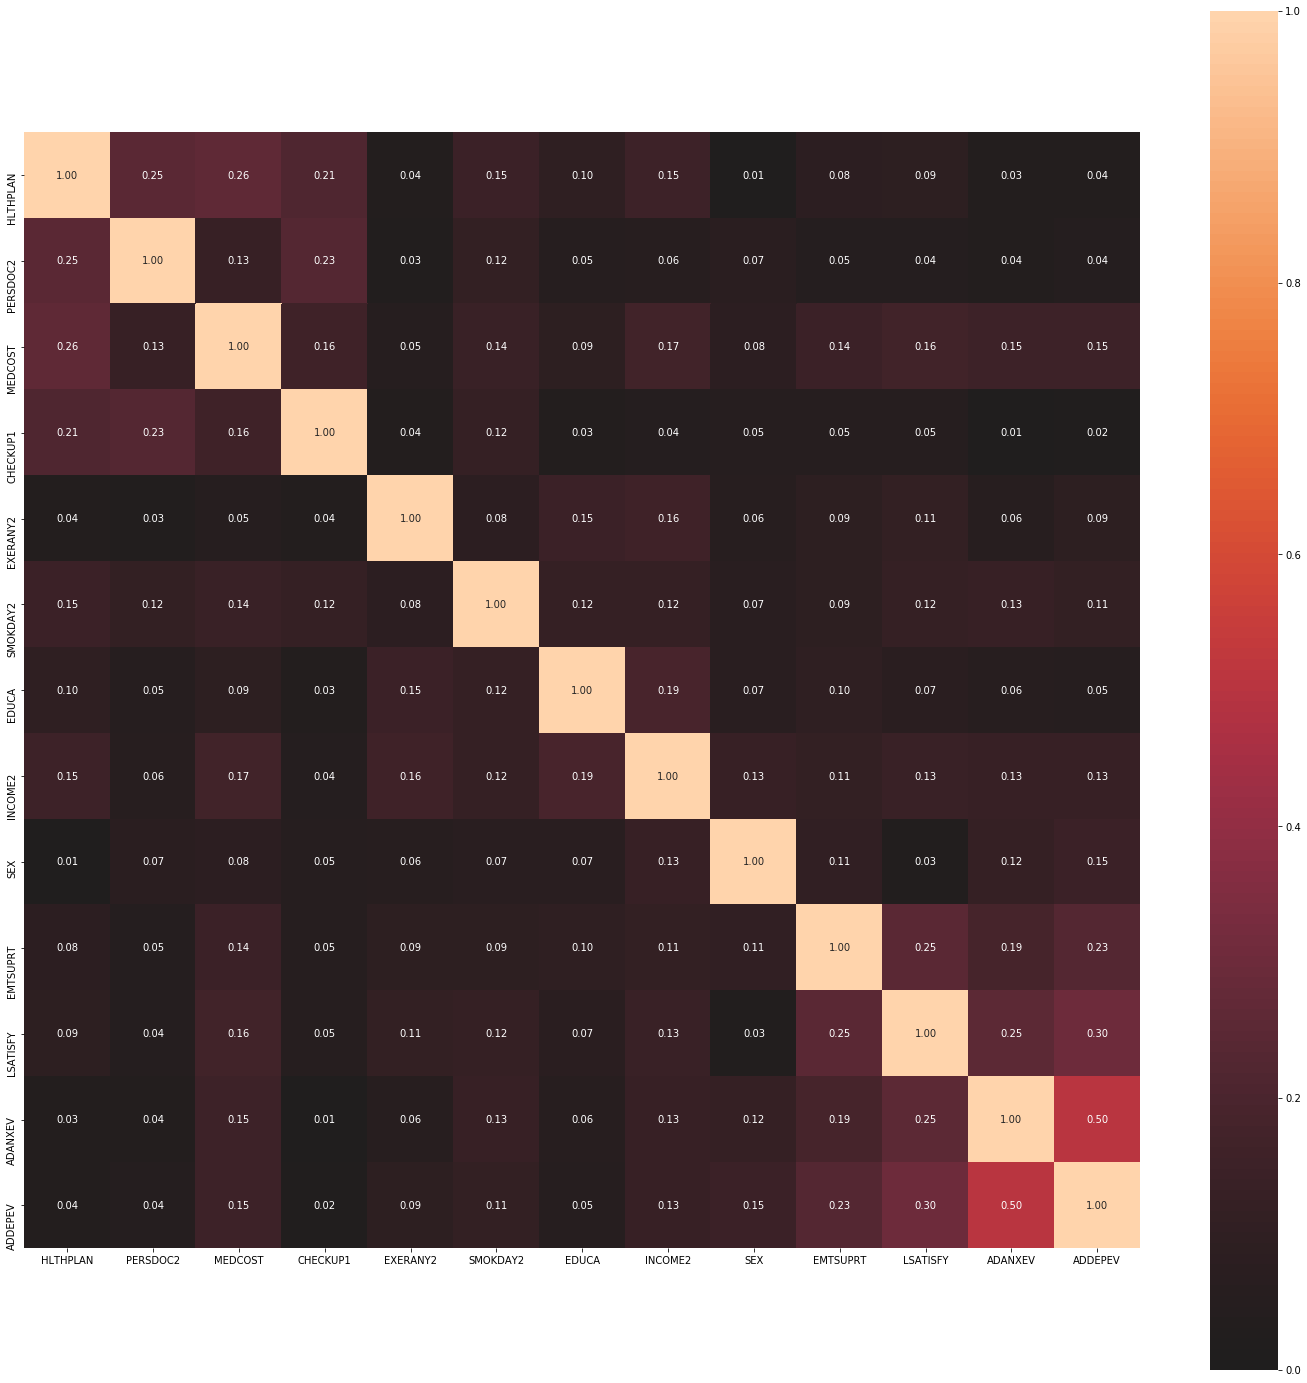

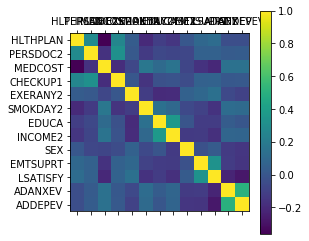

In [73]:
import pandas as pd
from dython import nominal

plt.matshow(df2.corr())
plt.xticks(range(len(df2.columns)), df2.columns)
plt.yticks(range(len(df2.columns)), df2.columns)
plt.colorbar()
plt.show()

In [58]:
df2_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in df2.columns:
    tmp['column'] = [c]
    tmp['values'] = [df2[c].unique()]
    tmp['values_count_incna'] = len(list(df2[c].unique()))
    tmp['values_count_nona'] = int(df2[c].nunique())
    tmp['num_miss'] = df2[c].isnull().sum()
    tmp['pct_miss'] = (df2[c].isnull().sum()/ len(df2)).round(3)*100
    df2_stats = df2_stats.append(tmp)
    
df2_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,HLTHPLAN,"[1.0, 2.0, 0.0]",3,3,0,0.0
0,PERSDOC2,"[3.0, 1.0, 2.0, 0.0]",4,4,0,0.0
0,MEDCOST,"[2.0, 1.0, 0.0]",3,3,0,0.0
0,CHECKUP1,"[3.0, 1.0, 8.0, 2.0, 4.0, 0.0]",6,6,0,0.0
0,EXERANY2,"[1.0, 2.0, 0.0]",3,3,0,0.0
0,SMOKDAY2,"[3.0, 2.0, 1.0]",3,3,0,0.0
0,EDUCA,"[6.0, 4.0, 5.0, 2.0, 3.0, 1.0, 0.0]",7,7,0,0.0
0,INCOME2,"[7.0, 6.0, 8.0, 4.0, 5.0, 1.0, 0.0, 3.0, 2.0]",9,9,0,0.0
0,SEX,"[1.0, 2.0]",2,2,0,0.0
0,EMTSUPRT,"[2.0, 1.0, 3.0, 5.0, 4.0, 0.0]",6,6,0,0.0


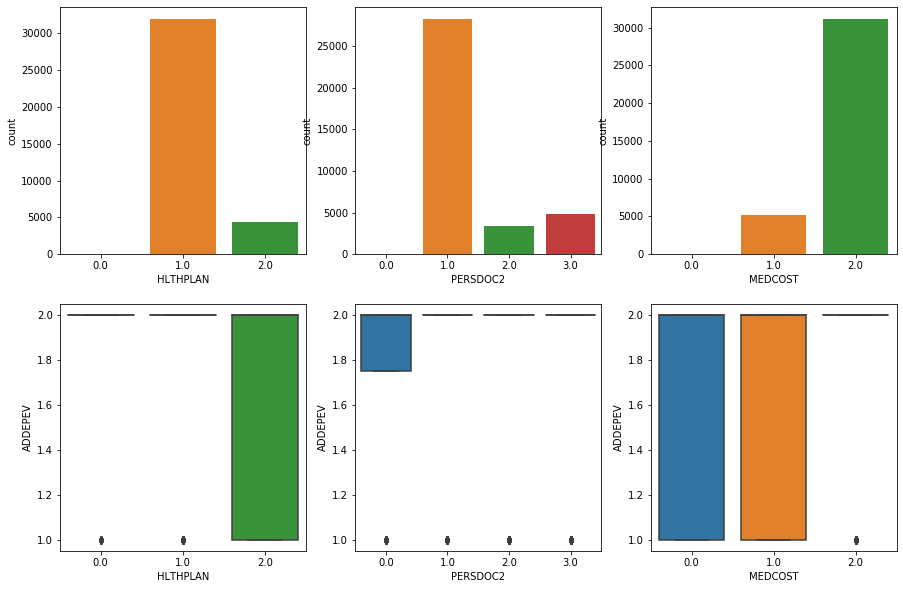

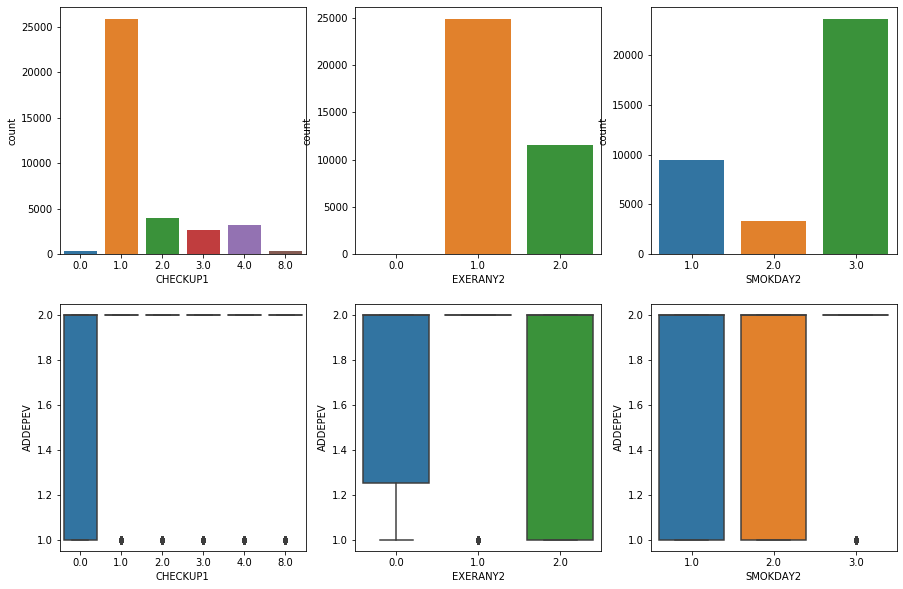

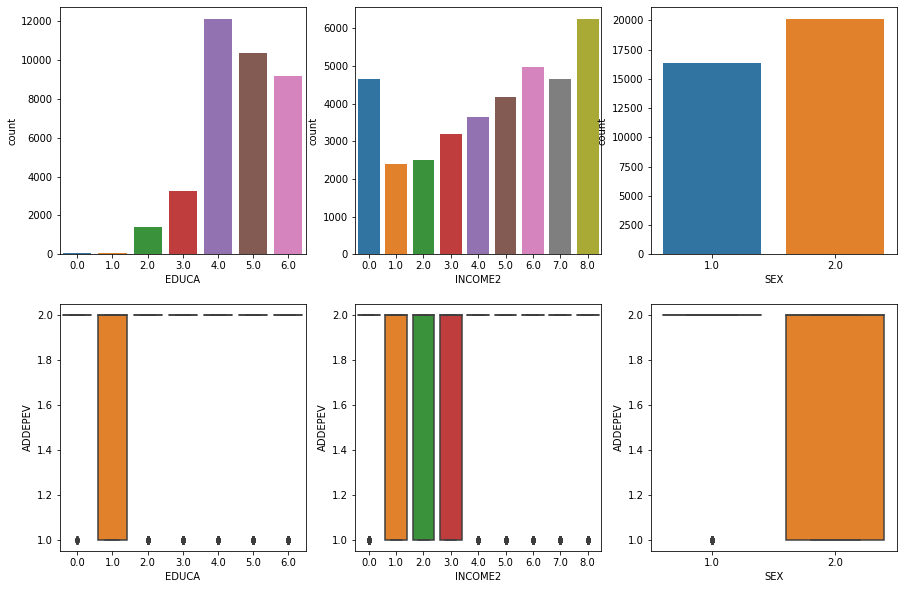

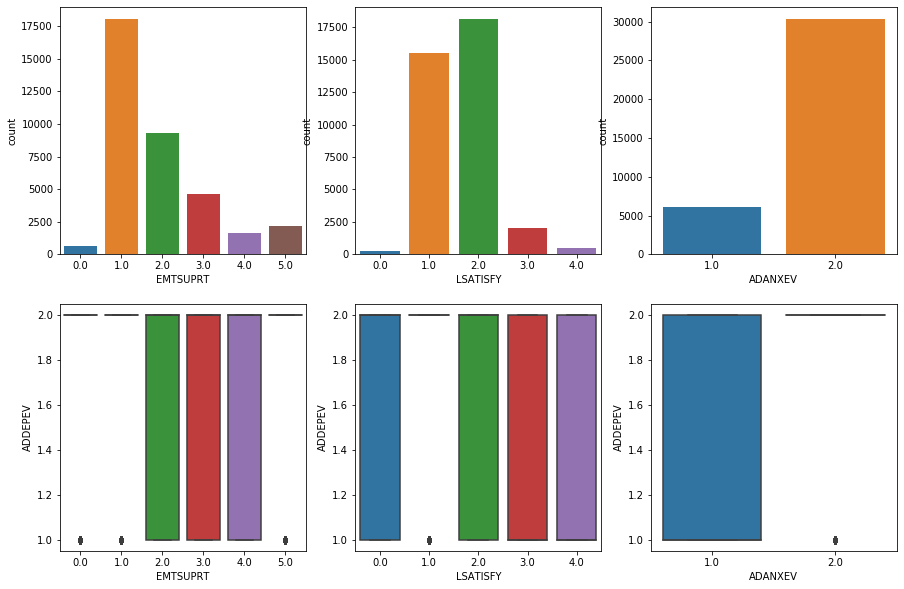

<Figure size 1080x720 with 0 Axes>

In [61]:
import matplotlib.pyplot as plt
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(df2.columns):
    if ix <= 3:
        if c != 'ADDEPEV':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = df2, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=df2, x=c, y='ADDEPEV', ax=ax2)
            #sns.violinplot(data=ds_cat, x=c, y='SalePrice', ax=ax2)
            #sns.swarmplot(data = ds_cat, x=c, y ='SalePrice', color = 'k', alpha = 0.4, ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

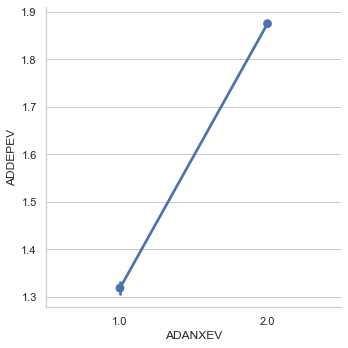

In [83]:
sns.catplot(x="ADANXEV", y="ADDEPEV",
            marker="o", linestyle="-",
            kind="point", data=df2)

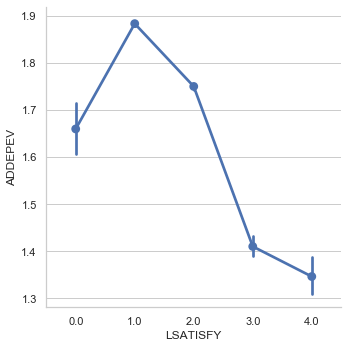

In [84]:
sns.catplot(x="LSATISFY", y="ADDEPEV",
            marker="o", linestyle="-",
            kind="point", data=df2)

In [64]:
df1.describe()

,PHYSHLTH,AGE,QLREST2
count,35586.000000,36217.000000,35803.000000
mean,5.603889,58.351437,8.007569
std,10.070900,15.225734,10.504844
min,0.000000,18.000000,0.000000
25%,0.000000,49.000000,0.000000
50%,0.000000,60.000000,3.000000
75%,5.000000,69.000000,15.000000
max,30.000000,99.000000,30.000000


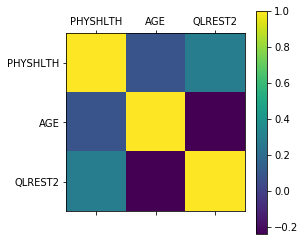

In [72]:
plt.matshow(df1.corr())
plt.xticks(range(len(df1.columns)), df1.columns)
plt.yticks(range(len(df1.columns)), df1.columns)
plt.colorbar()
plt.show()


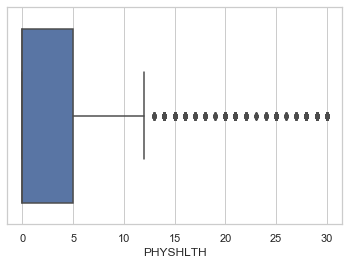

In [74]:
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.boxplot(x=df1["PHYSHLTH"])

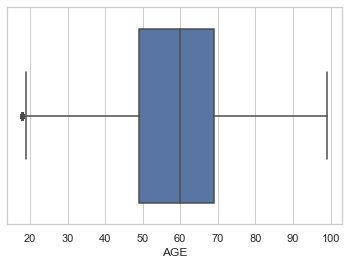

In [75]:
sns.set(style="whitegrid")

ax = sns.boxplot(x=df1["AGE"])

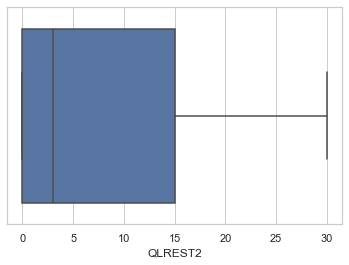

In [76]:
sns.set(style="whitegrid")

ax = sns.boxplot(x=df1["QLREST2"])

In [79]:
depression=df2['ADDEPEV']
df1['depression']=depression
df1.head()


,PHYSHLTH,AGE,QLREST2,depression
9633,3.0,52.0,5.0,2.0
9634,0.0,62.0,3.0,2.0
9645,0.0,51.0,1.0,2.0
9650,0.0,73.0,0.0,2.0
9651,0.0,44.0,3.0,1.0


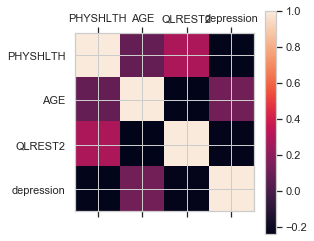

In [80]:
plt.matshow(df1.corr())
plt.xticks(range(len(df1.columns)), df1.columns)
plt.yticks(range(len(df1.columns)), df1.columns)
plt.colorbar()
plt.show()

In [85]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [86]:
df2new=pd.get_dummies(df2)

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(df2, depression)
model.intercept_

model.coef_

array([[-1.48658532, -0.25126477, -1.44359266, -0.09992667, -1.07827234,
        -0.39486606, -0.55717316, -0.04265737, -1.3689515 , -0.26248683,
        -0.8662766 ,  0.04554506, 14.22725505]])

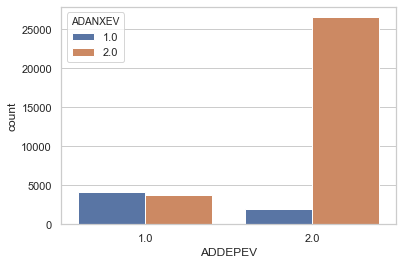

In [96]:
sns.countplot(x='ADDEPEV',hue='ADANXEV',data=df2)

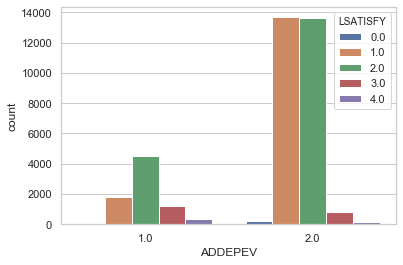

In [97]:
sns.countplot(x='ADDEPEV',hue='LSATISFY',data=df2)

In [99]:
new = pd.concat([df2new, df1],axis=1)
new.head()

,HLTHPLAN,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SMOKDAY2,EDUCA,INCOME2,SEX,EMTSUPRT,LSATISFY,ADANXEV,ADDEPEV,PHYSHLTH,AGE,QLREST2,depression
9633,1.0,3.0,2.0,3.0,1.0,3.0,6.0,7.0,1.0,2.0,2.0,2.0,2.0,3.0,52.0,5.0,2.0
9634,1.0,1.0,2.0,1.0,1.0,3.0,4.0,6.0,2.0,1.0,4.0,2.0,2.0,0.0,62.0,3.0,2.0
9645,1.0,1.0,2.0,8.0,1.0,2.0,6.0,8.0,2.0,1.0,1.0,2.0,2.0,0.0,51.0,1.0,2.0
9650,1.0,2.0,2.0,1.0,1.0,3.0,6.0,4.0,2.0,3.0,1.0,2.0,2.0,0.0,73.0,0.0,2.0
9651,1.0,1.0,2.0,1.0,1.0,1.0,5.0,5.0,2.0,1.0,2.0,1.0,1.0,0.0,44.0,3.0,1.0


In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
new=new.dropna()
new.columns
X=new[['HLTHPLAN', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'EXERANY2', 'SMOKDAY2',
       'EDUCA', 'INCOME2', 'SEX', 'EMTSUPRT', 'LSATISFY', 'ADANXEV', 
       'PHYSHLTH', 'AGE', 'QLREST2']]
y=new['depression']


In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [122]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

C:\Users\meagv\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  Returns
